### Business Understanding:
From an image of an x-ray from a pediatric patient, we want to be able to predict if the patient has pneumonia or not
<br>
### Data Understanding:
Data exists as images, which will be processed into vectors to create a neural network to make predictions.
Training data set: 1342 normal samples, 3876 pneumonia samples
Validation data set: 8 normal, 8 pneumonia
Test data set: 234 normal, 390 pneumonia
<br>
### Data Preparation:
Images will be loaded with keras preprocessing, as 64 x 64 pixels in grayscale (images have no color). Data will then be "unrowed" to turn each individual image to a vector. These values are then divided by 255 (max value) to normalize values to be between 0 and 1.
<br>
### Questions to answer:
* Most obvious is: how accurate is this model?
* Are false postives and false negatives comparable?
* Can we print out a prediction, given a particular image?

In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
val_gen = ImageDataGenerator().flow_from_directory('data/val', target_size=(64, 64), 
                                                   batch_size=16, color_mode='grayscale')
val_img,val_labels = next(val_gen)

train_gen = ImageDataGenerator().flow_from_directory('data/train', target_size=(64, 64), 
                                                   batch_size=100, color_mode='grayscale')
train_img,train_labels = next(train_gen)

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


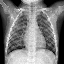

In [90]:
array_to_img(img_ar)

In [66]:
random_gen = ImageDataGenerator(
            rotation_range = 10,
            width_shift_range = 0.1,
            height_shift_range = 0.15,
            shear_range = 0.3,
            zoom_range = 0.2,
            channel_shift_range=50,
            fill_mode = 'nearest').flow(train_img,train_labels,batch_size=15000)
random_img,random_labels = next(random_gen)

random_img.shape

(100, 64, 64, 1)

In [63]:
x = np.concatenate((train_img,random_img))
x.shape

(200, 64, 64, 1)

In [85]:
random_img,random_labels = next(random_gen)
random_labels[0]

array([1., 0.], dtype=float32)

In [69]:
for_gen = ImageDataGenerator().flow_from_directory('data/train/NORMAL', target_size=(64, 64), 
                                                   batch_size=5, color_mode='grayscale')
gen_img,gen_labels = next(for_gen)

datagen = ImageDataGenerator(
            rotation_range = 10,
            width_shift_range = 0.1,
            height_shift_range = 0.15,
            shear_range = 0.3,
            zoom_range = 0.2,
            channel_shift_range=50,
            fill_mode = 'nearest')

Found 0 images belonging to 0 classes.


In [93]:
from PIL import Image
img_ = Image.open('data/train/NORMAL/IM-0135-0001.jpeg')
np.array(img_).shape

(1581, 1724)

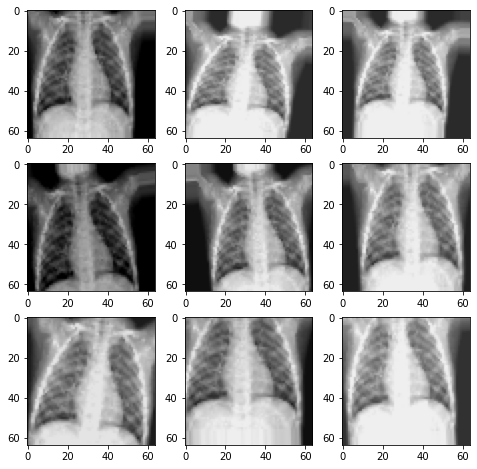

In [89]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img('data/train/NORMAL/IM-0135-0001.jpeg',target_size=(64,64))
# convert to numpy array
img_ar = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(img_ar, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range = 10,width_shift_range = 0.1,height_shift_range = 0.15,
                                shear_range = 0.3,zoom_range = 0.2,channel_shift_range=50,
                                fill_mode = 'nearest')
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
plt.figure(figsize=(8,8))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image,cmap='gray')
# show the figure
plt.show()

In [40]:
print(train_labels.shape)
print(val_gen.class_indices)
train_img.shape

(100, 2)
{'NORMAL': 0, 'PNEUMONIA': 1}


(100, 64, 64, 1)

In [86]:
train_unrow = train_img.reshape(100,-1)/255
val_unrow = val_img.reshape(16,-1)/255

train_y = train_labels[:,1].T
val_y = val_labels[:,1].T

print(train_y.shape)
train_unrow.shape

(100,)


(100, 4096)

In [88]:
eda_model = None
eda_model = models.Sequential()
eda_model.add(layers.Dense(1,activation='sigmoid',input_shape=(4096,)))
eda_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
eda_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4097      
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [89]:
results=eda_model.fit(train_unrow,train_y,epochs=25,batch_size=5,validation_data=(val_unrow,val_y))

Train on 100 samples, validate on 16 samples
Epoch 1/25
100/100 [==============================] - 1s 5ms/step - loss: 1.0245 - accuracy: 0.6200 - val_loss: 0.7072 - val_accuracy: 0.5000
Epoch 2/25
100/100 [==============================] - 0s 310us/step - loss: 0.7007 - accuracy: 0.6700 - val_loss: 2.3585 - val_accuracy: 0.5000
Epoch 3/25
100/100 [==============================] - 0s 380us/step - loss: 0.5028 - accuracy: 0.7700 - val_loss: 1.5308 - val_accuracy: 0.5000
Epoch 4/25
100/100 [==============================] - 0s 490us/step - loss: 0.4704 - accuracy: 0.8200 - val_loss: 0.5190 - val_accuracy: 0.6875
Epoch 5/25
100/100 [==============================] - 0s 460us/step - loss: 0.4055 - accuracy: 0.8100 - val_loss: 0.4738 - val_accuracy: 0.8125
Epoch 6/25
100/100 [==============================] - 0s 410us/step - loss: 0.4168 - accuracy: 0.8500 - val_loss: 0.5299 - val_accuracy: 0.7500
Epoch 7/25
100/100 [==============================] - 0s 420us/step - loss: 0.3685 - accuracy